# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"


#create df to clean and put apis frm openweather

cities_weather_df = pd.read_csv(output_data_file)
cities_weather_df_copy = cities_weather_df
cities_weather_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


In [31]:
#Are all elements equal  ...nope missing country marker.  Remove those rows that dont contain country markers
cities_weather_df.count()

City_ID       548
City          548
Cloudiness    548
Country       544
Date          548
Humidity      548
Lat           548
Lng           548
Max Temp      548
Wind Speed    548
dtype: int64

In [32]:
#What does the data look like?
cities_weather_df.dtypes

City_ID         int64
City           object
Cloudiness      int64
Country        object
Date            int64
Humidity        int64
Lat           float64
Lng           float64
Max Temp      float64
Wind Speed    float64
dtype: object

In [33]:
#Drop Country Rows so all elements are equal
cities_weather_df = cities_weather_df.dropna(how='any')
cities_weather_df.count()

City_ID       544
City          544
Cloudiness    544
Country       544
Date          544
Humidity      544
Lat           544
Lng           544
Max Temp      544
Wind Speed    544
dtype: int64

In [34]:
#Building for Loop to build new dataframe with 
cities_weather_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


In [35]:
#testing url pull, api key and viewing response
from pprint import pprint

from api_keys import weather_api_key

lat = cities_weather_df.iloc[1,6]
lon = cities_weather_df.iloc[1,7]

url =f"http://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&units=Imperial&appid={weather_api_key}"
    
response = requests.get(url).json()

pprint(response)

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -20.41, 'lon': 57.7},
 'dt': 1605415368,
 'id': 934322,
 'main': {'feels_like': 72,
          'humidity': 78,
          'pressure': 1014,
          'temp': 73.4,
          'temp_max': 73.4,
          'temp_min': 73.4},
 'name': 'Mahébourg',
 'sys': {'country': 'MU',
         'id': 2061,
         'sunrise': 1605403288,
         'sunset': 1605450385,
         'type': 1},
 'timezone': 14400,
 'visibility': 6000,
 'weather': [{'description': 'shower rain',
              'icon': '09d',
              'id': 521,
              'main': 'Rain'}],
 'wind': {'deg': 200, 'speed': 12.75}}


## Generate Cities List

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [36]:
#Start getting the weather from the clean dataframe using openweatherapi 
#City	Lat	Lng	Max Temp	Humidity	Cloudiness	Wind Speed	Country	Date
# n_city_id = response['cod']

n_city_name = []
n_lon = []
n_lat = []
n_max_temp = []
n_humidity = []
n_cloudiness = []
n_wind_speed = []
n_country = []
n_date = []

from pprint import pprint

from api_keys import weather_api_key

for index, row in cities_weather_df.iterrows():
    lat = row['Lat']
    lon = row['Lng']
    
    api_w_key = weather_api_key
    
    url =f"http://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&units=imperial&appid={api_w_key}"
    
    response = requests.get(url).json()
    
    n_city_id = response['id']
    city=response['name']
    
    print(f'The city code for {city} is {n_city_id}')
    
    n_city_name.append(response['name'])
    n_lat.append(response['coord']['lat'])
    n_lon.append(response['coord']['lon'])
    n_max_temp.append(response['main']['temp_max'])
    n_humidity.append(response['main']['humidity'])
    n_cloudiness.append(response['clouds']['all'])
    n_wind_speed.append(response['wind']['speed'])
    n_country.append(response['sys']['country'])
    n_date.append(response['dt'])
    

The city code for Ostrovnoy is 556268
The city code for Mahébourg is 934322
The city code for Qaanaaq is 3831208
The city code for Hougonglama is 2052479
The city code for Cape Town is 3369157
The city code for Atuona is 4020109
The city code for Flinders is 6255012
The city code for Tiksi is 2015306
The city code for Pushkinskiye Gory is 503965
The city code for Aykhal is 2027296
The city code for Castro is 3896218
The city code for Avarua is 4035715
The city code for Saskylakh is 2017155
The city code for Durango is 4011743
The city code for Albany is 5106834
The city code for Vilyuysk is 2013392
The city code for Ushuaia is 3833367
The city code for Bambous Virieux is 1106677
The city code for Kodinsk is 1503037
The city code for Teknāf is 1185095
The city code for Busselton is 2075265
The city code for Ambon is 3037899
The city code for Maragogi is 3395458
The city code for Terry is 5681948
The city code for Kantang is 1153072
The city code for Colonelganj is 1273850
The city code 

The city code for Larbont is 3007059
The city code for Hobart is 2163355
The city code for Mountjoy is 2962486
The city code for New Salalah is 7630442
The city code for Oskarsborg is 3143250
The city code for Ust-Tsilma is 477940
The city code for Marawi is 1701054
The city code for Nueva Loja is 3655185
The city code for Koronowo is 3095192
The city code for Ekimchan is 2024461
The city code for Carnarvon is 1014034
The city code for Saint-Denis is 2980916
The city code for Tabas is 113659
The city code for San Pedro is 3428576
The city code for Aketi is 220448
The city code for Moses Lake is 5803990
The city code for Província de Zambézia is 1024312
The city code for Hamilton is 5969782
The city code for San Juan del Sur is 3616726
The city code for Katabu is 1640972
The city code for Banjar is 1650233
The city code for Provideniya is 4031574
The city code for Andradas is 3472254
The city code for Magnano is 6535335
The city code for Manzhouli is 2035836
The city code for Lockhart i

The city code for Maniitsoq is 3421982
The city code for Meulaboh is 1214488
The city code for Cartagena del Chairá is 3792382
The city code for Macau is 3395998
The city code for Svodín is 3057273
The city code for Labuan is 1733782
The city code for Don Luan is 1582436
The city code for Zaysan is 1517060
The city code for Sioux Lookout is 6148373
The city code for Otane is 2185329
The city code for Vila do Maio is 3374120
The city code for Brae is 2654970
The city code for Russkiy Aktash is 583573
The city code for Kokstad is 988356
The city code for Lucapa is 145724
The city code for Birjand is 140463
The city code for Ingham is 2162737
The city code for Tilichiki is 2120591
The city code for Doha is 290030
The city code for Makakilo is 7262761
The city code for Lorengau is 2092164
The city code for Anan is 1865309
The city code for Synya is 485215
The city code for Thanatpin is 1292579
The city code for Altagracia de Orituco is 3649408
The city code for Anking is 1817993
The city c

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [37]:
#Convert Data to DF City	Lat	Lng	Max Temp	Humidity	Cloudiness	Wind Speed	Country	Date

n_cities_weather_df = pd.DataFrame({'City': n_city_name , 'Lat': n_lat, 'Long': n_lon,
                                  'Max Temp': n_max_temp, 'Humidity': n_humidity, 'Cloudiness': n_cloudiness,
                                  'Wind Speed': n_wind_speed, 'Country': n_country, 'Date': n_date})
n_cities_weather_df.count()

City          544
Lat           544
Long          544
Max Temp      544
Humidity      544
Cloudiness    544
Wind Speed    544
Country       544
Date          544
dtype: int64

In [38]:
n_cities_weather_df.to_csv("output_data/cities_1.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [68]:
n_cities_weather_df.index
n_cities_weather_df['Wind Speed'].min()

0.16

In [40]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = n_cities_weather_df.loc[n_cities_weather_df['Humidity']< 100]
print(clean_city_data['Humidity'].max())
print(clean_city_data['Humidity'].count())

99
530


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [41]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Latitude vs. Temperature Plot

In [49]:
clean_city_data.head(0)

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


<Figure size 432x288 with 0 Axes>

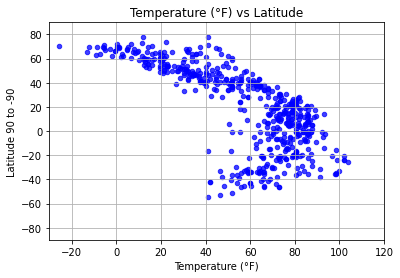

<Figure size 432x288 with 0 Axes>

In [61]:
plt.figure()
fig = clean_city_data.plot.scatter('Max Temp', 'Lat', color='blue', alpha = .75, grid = True)
plt.title('Temperature (°F) vs Latitude')
plt.xlabel('Temperature (°F)')
plt.ylabel('Latitude 90 to -90')
plt.xlim(-30,120)
plt.ylim(-90, 90)
plt.show()
plt.savefig("temp_v_lat.png")
'''The horizontal Zero off the y axis represents the equator and as the grid moves further from zero, in either direction, temperatures begin to decrease.'''

## Latitude vs. Humidity Plot

<Figure size 432x288 with 0 Axes>

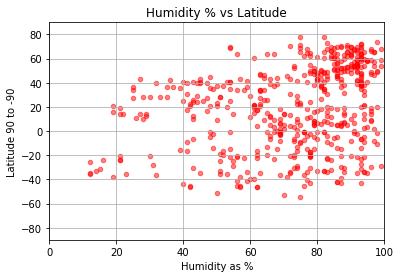

''

<Figure size 432x288 with 0 Axes>

In [72]:
plt.figure()
fig = clean_city_data.plot.scatter('Humidity', 'Lat', color='red', alpha=0.5, grid=True)
plt.title('Humidity % vs Latitude')
plt.xlabel('Humidity as %')
plt.ylabel('Latitude 90 to -90')
plt.xlim(0, 100)
plt.ylim(-90, 90)
plt.show()
plt.savefig("humidity_v_lat.png")
'''Humidity is fairly evenly distributed around horizonal zero, but has a significant cluster of points in the 60 degree with over 80% humidity.'''

## Latitude vs. Cloudiness Plot

<Figure size 432x288 with 0 Axes>

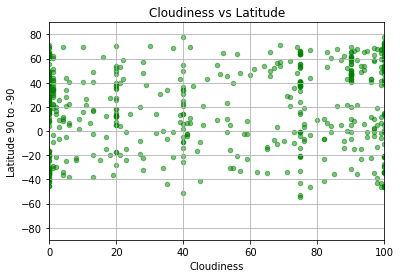

<Figure size 432x288 with 0 Axes>

In [65]:
plt.figure()
fig = clean_city_data.plot.scatter('Cloudiness', 'Lat', color='green', alpha=0.5, grid=True)
plt.title('Cloudiness vs Latitude')
plt.xlabel('Cloudiness')
plt.ylabel('Latitude 90 to -90')
plt.xlim(0, 100)
plt.ylim(-90, 90)
plt.show()
plt.savefig("cloud_v_lat.png")

''' Cloudiness is even distributed along the horizontal zero line.  No discernable points or clusters.'''

## Latitude vs. Wind Speed Plot

<Figure size 432x288 with 0 Axes>

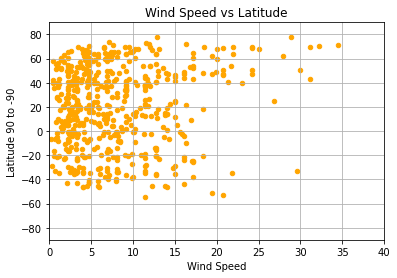

<Figure size 432x288 with 0 Axes>

In [70]:
plt.figure()
fig = clean_city_data.plot.scatter('Wind Speed', 'Lat', color='orange', alpha=1, grid=True)
plt.title('Wind Speed vs Latitude')
plt.xlabel('Wind Speed')
plt.ylabel('Latitude 90 to -90')
plt.xlim(0, 40)
plt.ylim(-90, 90)
plt.show()
plt.savefig("wind_v_lat.png")

'''Wind speed is even distributed between 0 and 10 and along the horizontal zero line.  A few high wind speeds, above 30, occur further away from zero.'''

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)